# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

### Check Missing values

In [3]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### check datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

### check no:of unique values of ech column

In [5]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [6]:
print("categories in 'sales_channel' variable: ",end=' ')
print(df['sales_channel'].unique())

print("cataegories in 'trip_type' variable: ",end=' ')
print(df['trip_type'].unique())

print("cataegories in 'trip_type' variable: ",end=' ')
print(df['flight_day'].unique())

print("categories of 'booking_origin' variable: ",end= ' ')
print(df['booking_origin'].unique())


print("categories in 'route' variable: ",end=' ')
print(df['route'].unique())

categories in 'sales_channel' variable:  ['Internet' 'Mobile']
cataegories in 'trip_type' variable:  ['RoundTrip' 'CircleTrip' 'OneWay']
cataegories in 'trip_type' variable:  ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
categories of 'booking_origin' variable:  ['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongo

### check statistics of dataset

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Check Duplicates

In [8]:
df.duplicated().sum()

719

In [9]:
duplicates = df.duplicated()

In [10]:
df[duplicates]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [11]:
# remove duplicates
df= df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [12]:
df.shape

(49281, 14)

## Define numerical and categorical columns

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

We have 5 categorical features : ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


# Exploring Data ( Visualization )

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'booking completed Distribution')

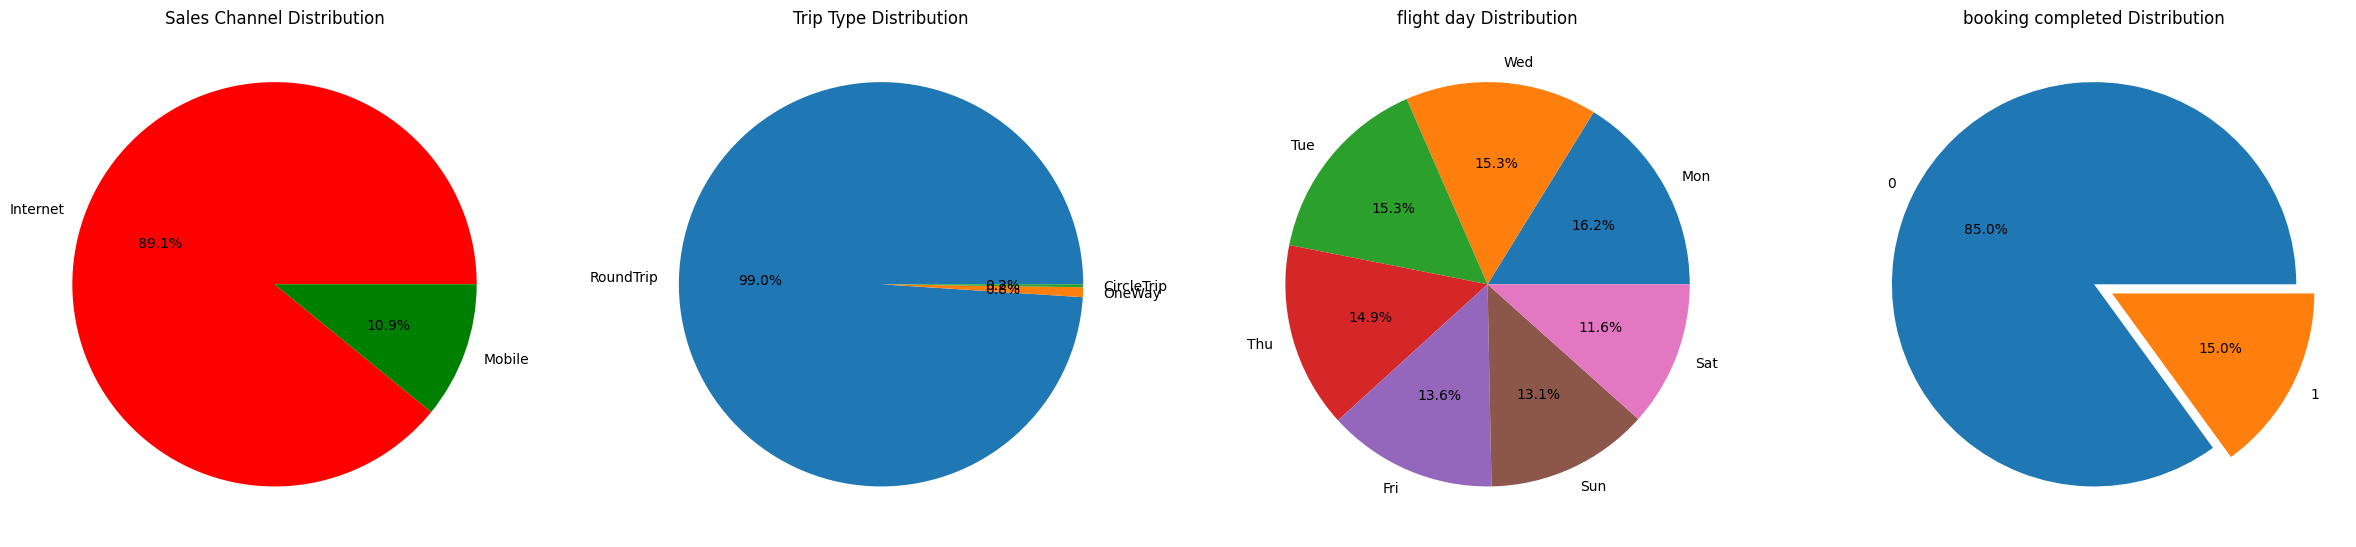

In [15]:
plt.rcParams['figure.figsize'] = (30,17)

plt.subplot(1,4,1)
x=df['sales_channel'].value_counts()
labels=x.index
plt.pie(x,labels=labels,colors=['red','green'],autopct='%1.1f%%')
plt.title('Sales Channel Distribution')


plt.subplot(1, 4, 2)  # 1 row, 2 columns, 2nd plot
x=df['trip_type'].value_counts()
labels=x.index
plt.pie(x, labels=labels,autopct='%1.1f%%')
plt.title('Trip Type Distribution')


plt.subplot(1,4,3)
x=df['flight_day'].value_counts()
labels=x.index
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title('flight day Distribution')



plt.subplot(1,4,4)
x=df['booking_complete'].value_counts()
labels=x.index
plt.pie(x,labels=labels,autopct='%1.1f%%',explode=[0, 0.1])
plt.title('booking completed Distribution')



Top 10 Commonly Used Routes:
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
ICNSYD     683
DMKPER     677
DPSICN     658
DMKOOL     652
MELTPE     637
Name: count, dtype: int64


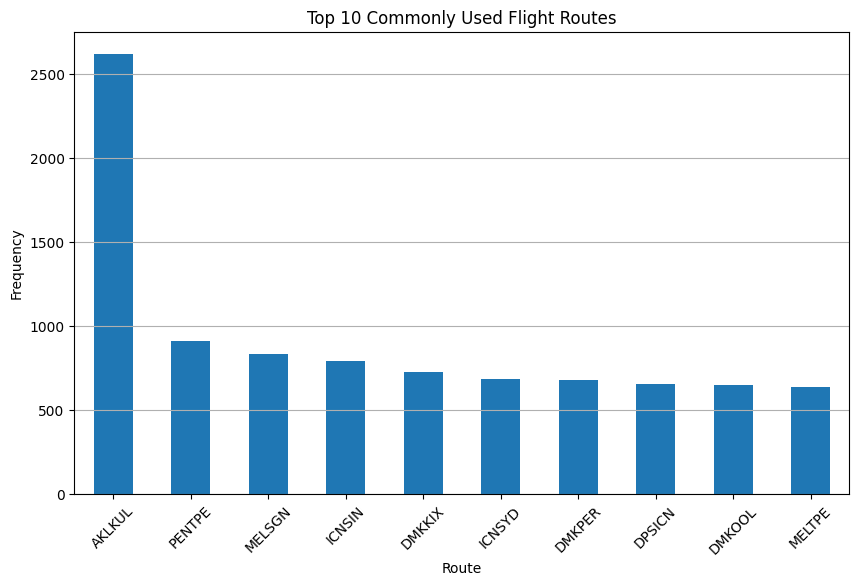

In [16]:
import matplotlib.pyplot as plt


# Check the frequency of each route
route_counts = df['route'].value_counts()

# Print the top 10 commonly used routes
top_routes = route_counts.head(10)
print("Top 10 Commonly Used Routes:")
print(top_routes)

# Plot the top 10 commonly used routes
plt.figure(figsize=(10, 6))
top_routes.plot(kind='bar')
plt.title("Top 10 Commonly Used Flight Routes")
plt.xlabel("Route")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

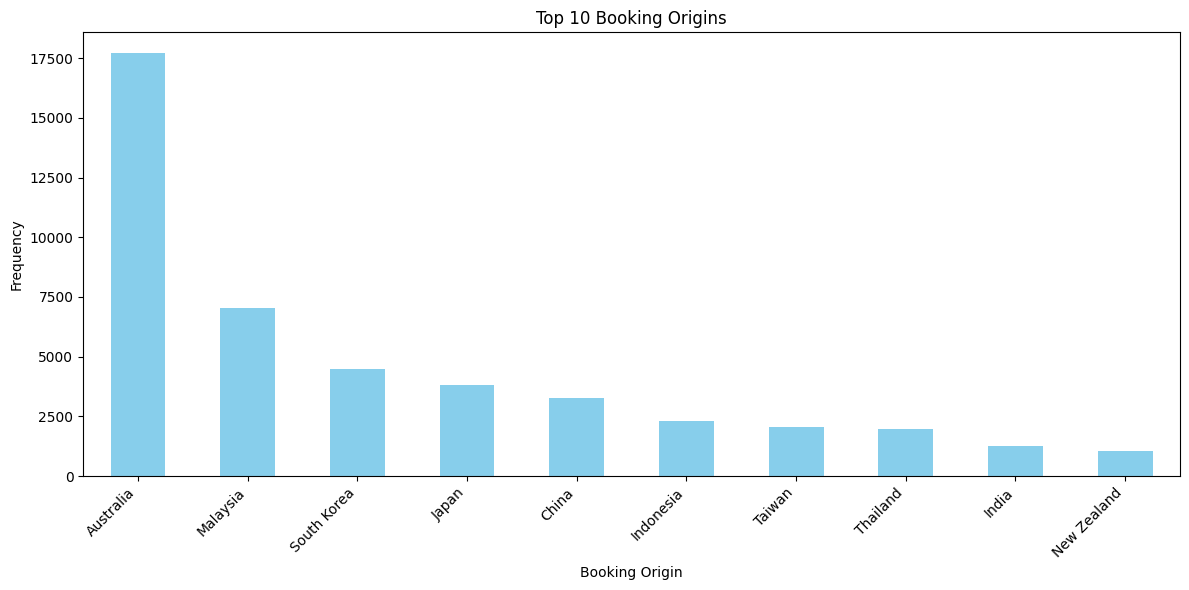

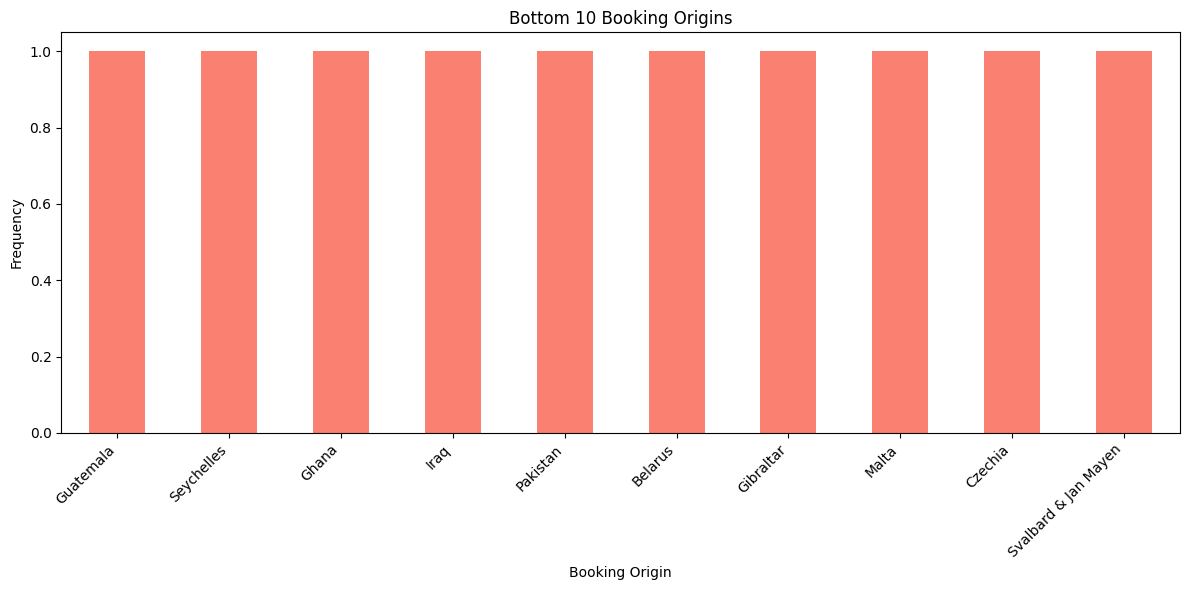

In [17]:
# Get the frequency of each booking origin
booking_origin_counts = df['booking_origin'].value_counts()

# Sort the booking origins by frequency
sorted_booking_origins = booking_origin_counts.sort_values(ascending=False)

# Extract top 10 and bottom 10 booking origins
top_10_booking_origins = sorted_booking_origins.head(10)
bottom_10_booking_origins = sorted_booking_origins.tail(10)

# Plot the bar plot for top 10 booking origins
plt.figure(figsize=(12, 6))
top_10_booking_origins.plot(kind='bar', color='skyblue')
plt.title('Top 10 Booking Origins')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar plot for bottom 10 booking origins
plt.figure(figsize=(12, 6))
bottom_10_booking_origins.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Booking Origins')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

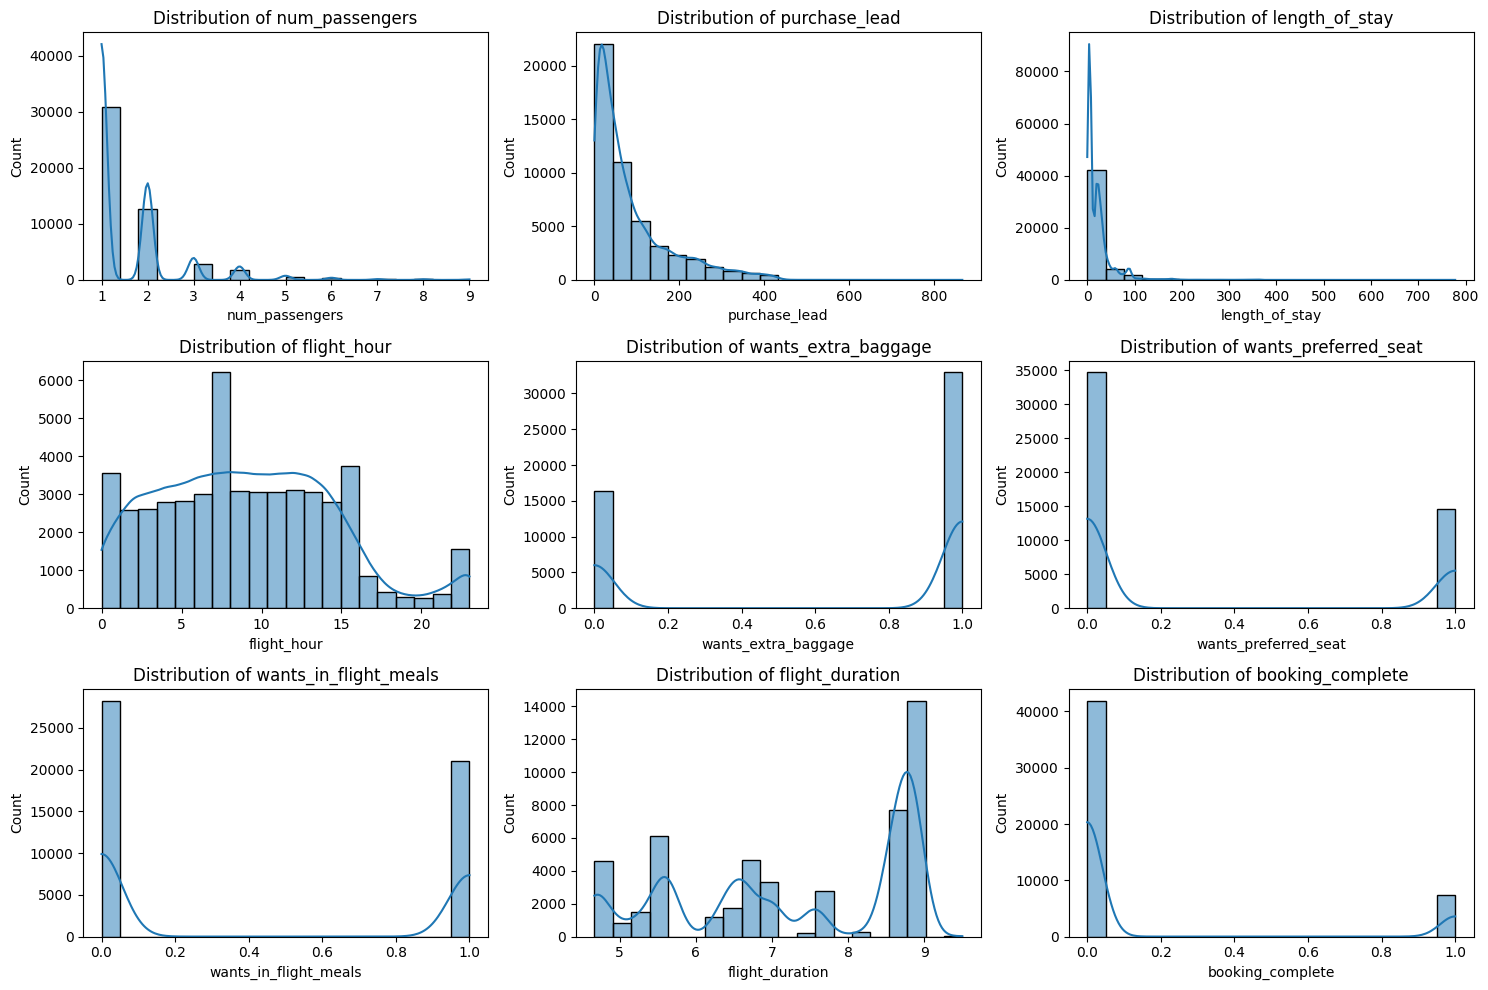

In [18]:
# 1. Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

* Distribution of num_passengers: Most bookings are for one passenger, with a steep decline as the number of passengers increases. There are very few bookings with more than 4 passengers.

* Distribution of purchase_lead: many customers tend to book last-minute or within a week of their travel date.while some customers plan far in advance, it’s much less common in your dataset.

* Distribution of length_of_stay: The majority of trips have a short length of stay, with most customers staying less than 20 days. A few outliers show longer stays, but the data is heavily skewed to the right.

* Distribution of flight_hour: The flight hours are fairly distributed across the day, with a slight peak around the 10th hour. There's no strong skew, suggesting flights occur at various times.

* Distribution of wants_extra_baggage:There is a clear majority preference for extra baggage, which could imply that customers perceive additional baggage as valuable for their travel needs

* Distribution of wants_preferred_seat: ustomers chose not to specify a preferred seat when booking their flight.

* Distribution of wants_in_flight_meals: Most customers do not select in-flight meals

* Distribution of flight_duration: The majority of flights are between 5 and 9 hours, with a clear peak at around 8-9 hours. This could indicate that most flights are of medium to long distance.

* Distribution of booking_complete: This is target variable (binary outcome), where most customers have not completed a booking (0), and fewer have (1). The imbalance indicates that predicting completed bookings might be challenging due to the skewed data.


Overall Insights:
* Skewed Features: Many features like purchase_lead, length_of_stay, and num_passengers are heavily skewed to the right, meaning a majority of the data points cluster toward smaller values, with some extreme outliers.

* imbalance in the booking_complete target variable will likely necessitate techniques like resampling or assigning class weights for better prediction results.


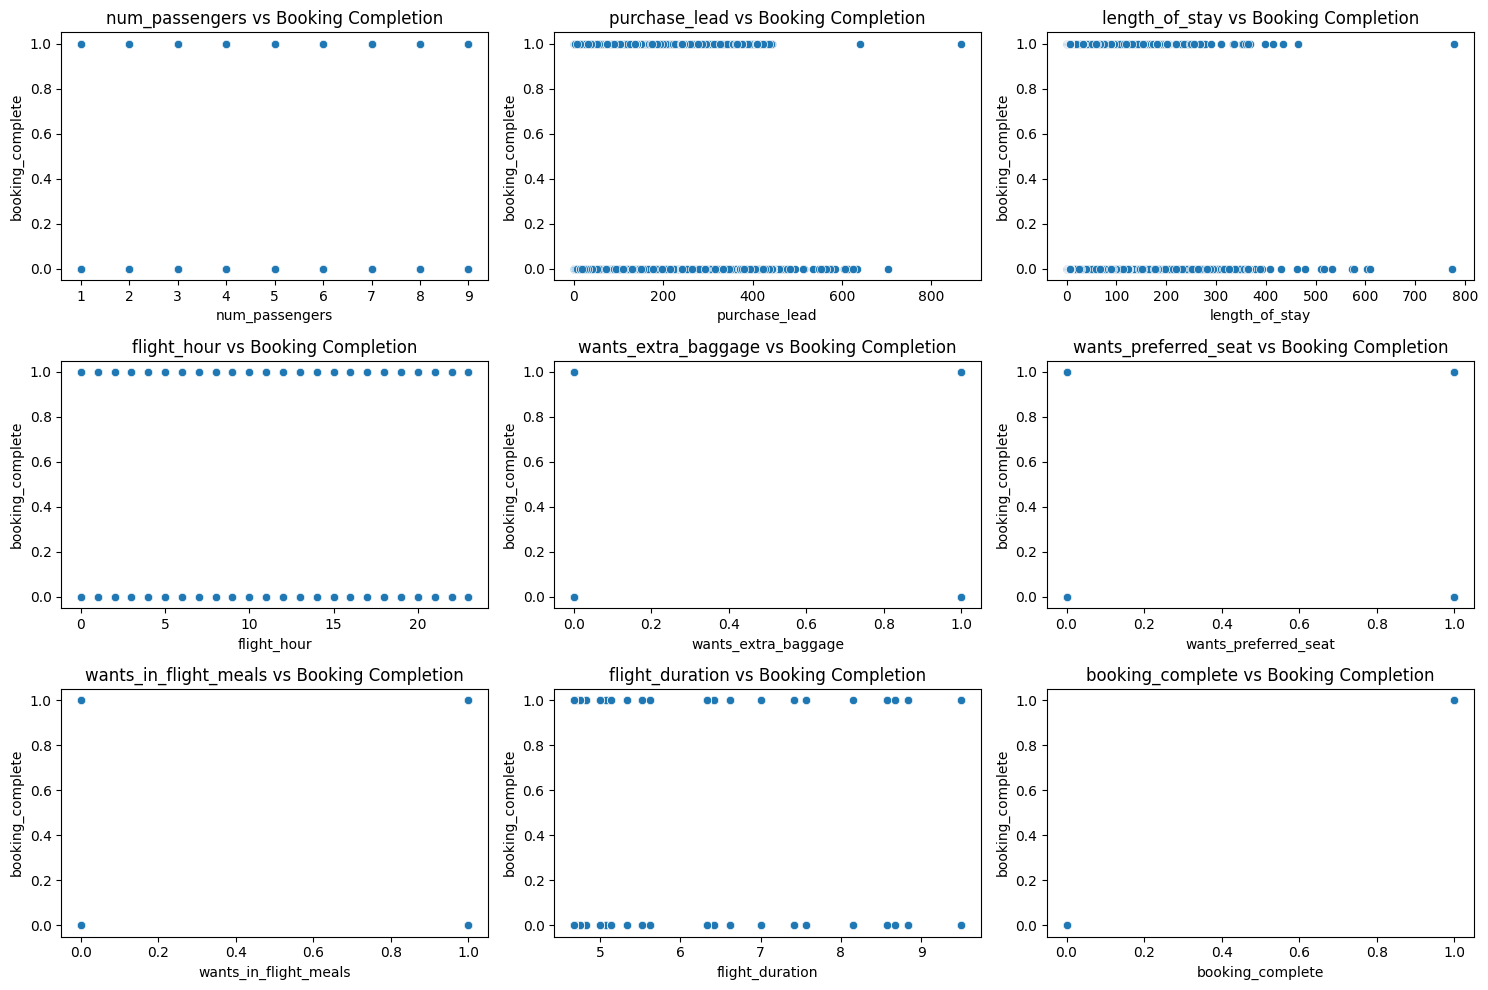

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['booking_complete'])
    plt.title(f'{feature} vs Booking Completion')
plt.tight_layout()
plt.show()

* none of the numeric features exhibit a strong, direct correlation with the target variable (booking_complete),

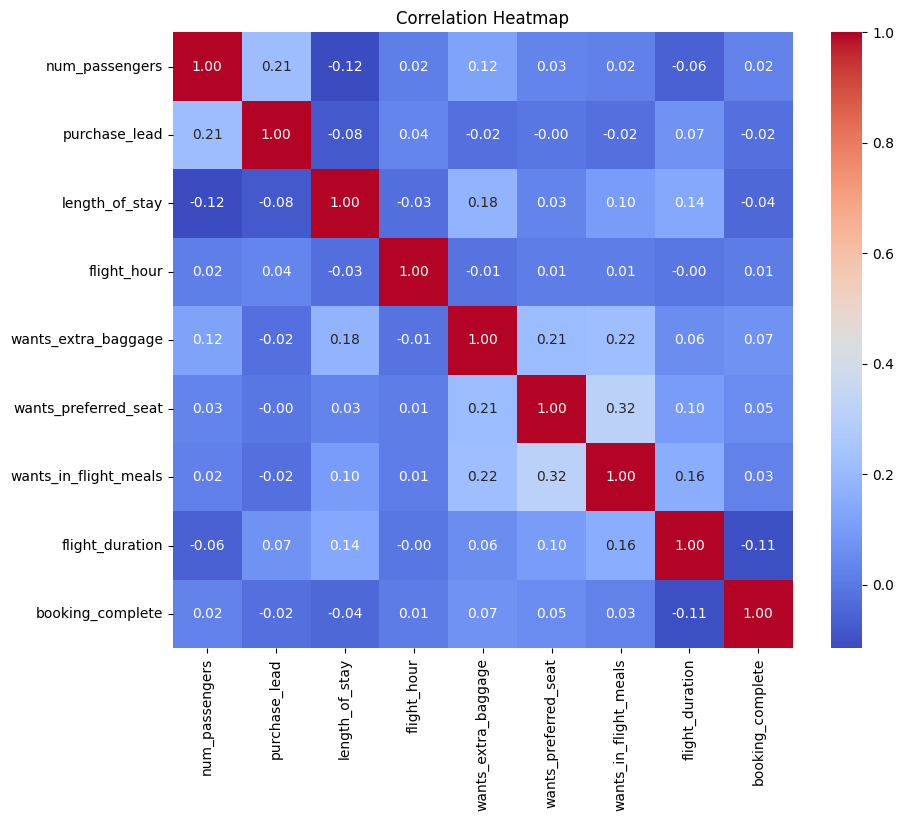

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* The correlation of booking_complete with other features is quite low across the board, with no single feature showing a strong linear relationship with the target.
* wants_extra_baggage and flight_duration show slightly higher positive and negative correlations with booking_complete, but these values are still relatively weak (close to 0.07 and -0.11, respectively).

In [21]:
print(numeric_features)
numeric_features.remove('booking_complete')
print(numeric_features)
print(categorical_features)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


### Outlier Removal 

In [22]:
# Outlier Removal using IQR method

def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers
df = remove_outliers_iqr(df, numeric_features)
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


### Feature Enginerring

In [23]:
X = df.drop(columns=['booking_complete'])
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52


In [24]:
X.shape

(39754, 13)

In [25]:
y=df['booking_complete']
y.value_counts()

booking_complete
0    33801
1     5953
Name: count, dtype: int64

The output of df['booking_complete'].value_counts() indicates that your dataset is indeed imbalanced, with a significantly higher number of instances for the class "0" (not booked) compared to class "1" (booked). Hence we need to apply SMOTE  after the train test split, and only on the training set

In [26]:
# Split the data into train and test sets (80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(31803, 13)

In [28]:
X_test.shape

(7951, 13)

In [29]:
#Create a column transformer for preprocessing 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,TargetEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')
target_encoder=TargetEncoder()

# Identify feature types

high_cardinality_features = ['route', 'booking_origin', 'flight_day'] # apply TargetEncoder. need to apply target encoding on flight day as well.hence added here
low_cardinality_features = ['sales_channel', 'trip_type'] # apply one hot ecoding 
num_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, low_cardinality_features),
        ('TargetEncoder', target_encoder, high_cardinality_features),
        ('StandardScaler', numeric_transformer, num_features)
    ],
    remainder='passthrough'  # Pass through any remaining features
)

# Apply the preprocessing to the training set
X_train_transformed = preprocessor.fit_transform(X_train,y_train)

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)


In [30]:
# Apply SMOTE only to the training data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Model Training and Evaluation

In [31]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score,accuracy_score


# Define models to evaluate
models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced')  # Adding Random Forest as well
}

# Loop through models, train, and evaluate
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data (SMOTE)

    # Make predictions on the test set
    y_pred = model.predict(X_test_transformed)

    # Print results for each model
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))



Training XGBoost...


/Users/ashikacherikkaparambath/Desktop/britishairways/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix for XGBoost:
[[3279 3451]
 [ 251  970]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.49      0.64      6730
           1       0.22      0.79      0.34      1221

    accuracy                           0.53      7951
   macro avg       0.57      0.64      0.49      7951
weighted avg       0.82      0.53      0.59      7951


Training LogisticRegression...

Confusion Matrix for LogisticRegression:
[[4954 1776]
 [ 360  861]]

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      6730
           1       0.33      0.71      0.45      1221

    accuracy                           0.73      7951
   macro avg       0.63      0.72      0.63      7951
weighted avg       0.84      0.73      0.76      7951


Training RandomForest...

Confusion Matrix for RandomForest:
[[5439 1291]
 [ 538  683]]

Classification

In [32]:
# 2. Tuning Random Forest with class balancing

# Set up the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': ['balanced']  # To handle class imbalance
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              scoring='f1_macro', cv=5, n_jobs=-1, verbose=2)

# Fit the model
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model and evaluate on test set
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_transformed)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_spli

In [33]:
# Print Random Forest results
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Best parameters for Random Forest: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix for Random Forest:
[[5467 1263]
 [ 575  646]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      6730
           1       0.34      0.53      0.41      1221

    accuracy                           0.77      7951
   macro avg       0.62      0.67      0.63      7951
weighted avg       0.82      0.77      0.79      7951



ROC-AUC Score for Best Random Forest: 0.7488


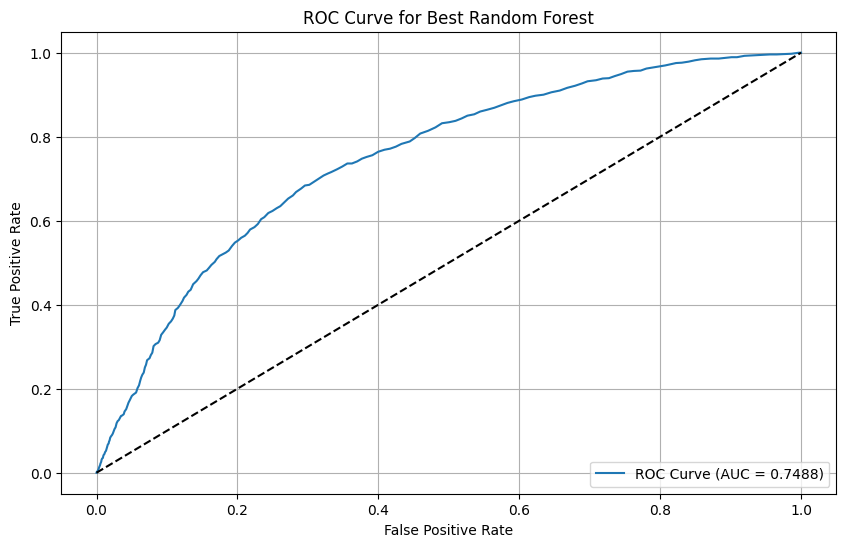

In [34]:
y_pred_proba_rf = best_rf_model.predict_proba(X_test_transformed)[:, 1]

# Calculate ROC-AUC Score for best Random Forest model
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score for Best Random Forest: {roc_auc_rf:.4f}")

# ROC Curve for Best Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

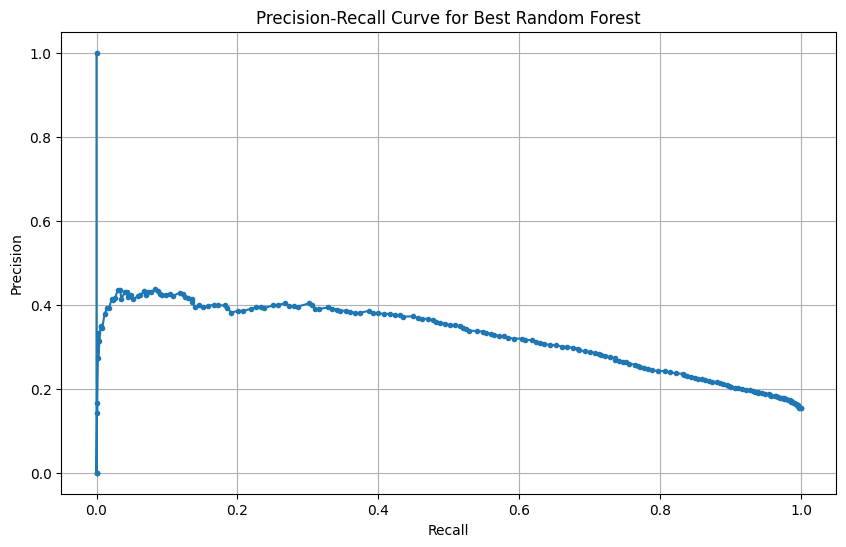

F1 Score for Best Random Forest: 0.4128


In [35]:
# Precision-Recall Curve for Best Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
f1_rf = f1_score(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best Random Forest')
plt.grid()
plt.show()

print(f"F1 Score for Best Random Forest: {f1_rf:.4f}")

In [36]:
importances = best_rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,TargetEncoder__booking_origin,0.279426
5,TargetEncoder__route,0.193725
10,StandardScaler__length_of_stay,0.120110
15,StandardScaler__flight_duration,0.092924
9,StandardScaler__purchase_lead,0.083642
7,TargetEncoder__flight_day,0.083092
11,StandardScaler__flight_hour,0.074147
8,StandardScaler__num_passengers,0.017848
14,StandardScaler__wants_in_flight_meals,0.012780
12,StandardScaler__wants_extra_baggage,0.012379


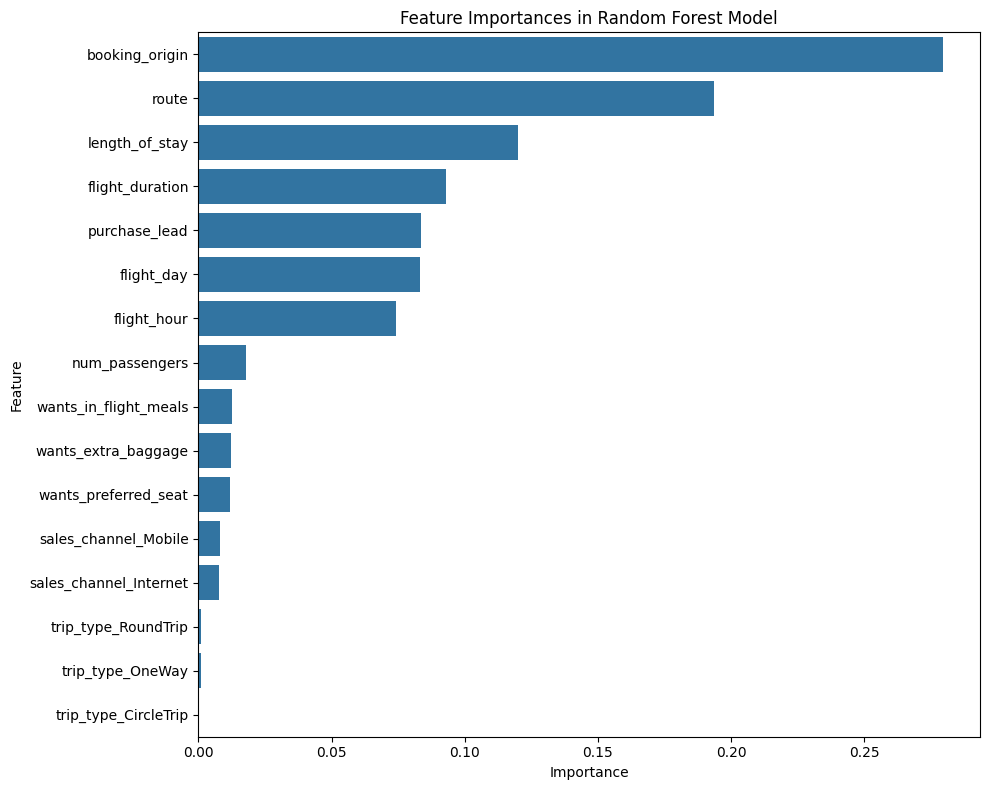

In [38]:
# Remove transformer prefixes from feature names
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace(r'^(TargetEncoder__|StandardScaler__|OneHotEncoder__)', '', regex=True)

# Plot Feature Importance with clean feature names
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()


* The most important feature, suggesting that where the booking originates from plays a significant role in predicting the target variable.

* The specific route of the flight is the second most important predictor.
